In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!unzip /content/drive/'My Drive'/'Colab Notebooks'/data.zip

Streaming output truncated to the last 5000 lines.
 extracting: DataCNN/Train/38/00038_00060_00008.png  
 extracting: DataCNN/Train/38/00038_00038_00000.png  
  inflating: DataCNN/Train/38/00038_00059_00023.png  
 extracting: DataCNN/Train/38/00038_00005_00024.png  
 extracting: DataCNN/Train/38/00038_00015_00028.png  
 extracting: DataCNN/Train/38/00038_00025_00020.png  
 extracting: DataCNN/Train/38/00038_00012_00008.png  
 extracting: DataCNN/Train/38/00038_00068_00004.png  
 extracting: DataCNN/Train/38/00038_00005_00000.png  
 extracting: DataCNN/Train/38/00038_00068_00024.png  
  inflating: DataCNN/Train/38/00038_00020_00027.png  
 extracting: DataCNN/Train/38/00038_00031_00017.png  
 extracting: DataCNN/Train/38/00038_00018_00010.png  
 extracting: DataCNN/Train/38/00038_00059_00018.png  
 extracting: DataCNN/Train/38/00038_00054_00025.png  
 extracting: DataCNN/Train/38/00038_00011_00012.png  
  inflating: DataCNN/Train/38/00038_00059_00025.png  
  inflating: DataCNN/Train/38/0

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image,ImageOps
from keras.layers import Conv2D, MaxPool2D,Dense,Dropout,Flatten
from keras.utils import to_categorical 
from keras.models import Sequential

In [ ]:
size=50

In [ ]:
%cd /content/DataCNN
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            path_to_image=path+'/'+a
            image = Image.open("{}".format(path_to_image)).convert('RGB')
            if i==28:
              image_flip=ImageOps.mirror(image)
              image_flip=image_flip.resize((size,size))
              data.append(np.array(image_flip))
              labels.append(i)
              
            image = image.resize((size,size))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

print(len(data))
print(len(labels))

/content/DataCNN
39749
39749


In [ ]:
data=np.array(data)
labels=np.array(labels)
X_train,x_test,Y_train,y_test=train_test_split(data,labels,train_size=0.8)
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,train_size=0.75)
print(x_train.shape,x_test.shape,x_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

(23849, 50, 50, 3) (7950, 50, 50, 3) (7950, 50, 50, 3)
(23849,) (7950,) (7950,)


In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)
print(y_train.shape)
print(y_test.shape)


(23849, 43)
(7950, 43)


In [ ]:
model=Sequential()

#convolutional block
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())

#neural network
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
epochs=40

In [ ]:
from keras.callbacks import EarlyStopping
train_history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=epochs)

Epoch 1/40
746/746 [==============================] - 6s 9ms/step - loss: 1.8115 - accuracy: 0.5890 - val_loss: 0.3964 - val_accuracy: 0.8961
Epoch 2/40
746/746 [==============================] - 6s 8ms/step - loss: 0.3942 - accuracy: 0.8878 - val_loss: 0.1778 - val_accuracy: 0.9513
Epoch 3/40
746/746 [==============================] - 6s 8ms/step - loss: 0.2599 - accuracy: 0.9253 - val_loss: 0.1457 - val_accuracy: 0.9601
Epoch 4/40
746/746 [==============================] - 6s 8ms/step - loss: 0.2082 - accuracy: 0.9372 - val_loss: 0.1458 - val_accuracy: 0.9566
Epoch 5/40
746/746 [==============================] - 6s 8ms/step - loss: 0.1959 - accuracy: 0.9428 - val_loss: 0.1150 - val_accuracy: 0.9652
Epoch 6/40
746/746 [==============================] - 6s 8ms/step - loss: 0.1668 - accuracy: 0.9496 - val_loss: 0.1257 - val_accuracy: 0.9623
Epoch 7/40
746/746 [==============================] - 6s 8ms/step - loss: 0.1746 - accuracy: 0.9490 - val_loss: 0.0838 - val_accuracy: 0.9779
Epoch 

/content


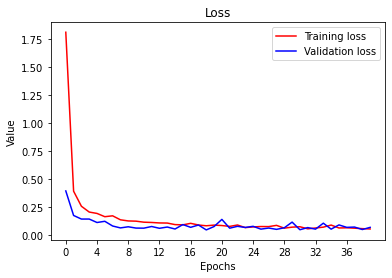

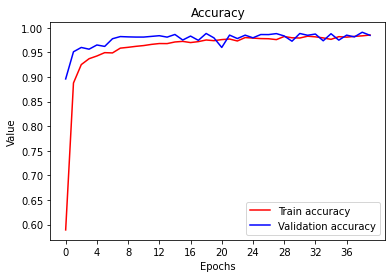

In [ ]:
%cd /content

title=['Loss','Accuracy']
parameter={0:['loss','val_loss'],1:['accuracy','val_accuracy']}
labels={0:['Training loss','Validation loss'],1:['Train accuracy','Validation accuracy']}
for i in range(2): 
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[0]],color='red',label=labels.get(i)[0])
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[1]],color='blue',label=labels.get(i)[1])
  plt.title(title[i])
  plt.xticks(np.arange(0,epochs,4))
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend()
  plt.savefig("{}.png".format(title[i]))
  plt.show()

plt.show()

In [ ]:
%cd /content/DataCNN
import pandas as pd
table=pd.read_csv('Test.csv')
labels_test=table['ClassId'].values
path_image=table['Path'].values
table.head()

/content/DataCNN


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
data_test=[]
for path in path_image:
  image=Image.open("{}".format(path))
  image=image.resize((size,size))
  data_test.append(np.array(image))

x_test_new=np.array(data_test)
labels_predict_for_test=np.argmax(model.predict(x_test_new),axis=1)
print(labels_predict_for_test.shape)
print(labels_test.shape)


(12630,)
(12630,)


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,labels_test))


Accuracy for Test: 0.9503562945368171


In [ ]:
table_meta=pd.read_csv('Meta.csv')
labels_meta=table_meta['ClassId'].values
path_image_meta=table_meta['Path'].values
print(table_meta.shape)
print(labels_meta.shape)

(43, 5)
(43,)


In [ ]:
data_meta=[]
for path in path_image_meta:
  image=Image.open("{}".format(path)).convert('RGB')
  image=image.resize((size,size))
  data_meta.append(np.array(image))

x_meta_new=np.array(data_meta)
labels_predict_for_meta=np.argmax(model.predict(x_meta_new),axis=1)
print(labels_predict_for_meta.shape)



(43,)


In [ ]:

print("Accuracy for meta:",accuracy_score(labels_predict_for_meta,labels_meta))

Accuracy for meta: 0.3953488372093023


In [ ]:
%cd /content
model.save('SignTraffic{}.h5'.format(size))

/content
